In [1]:
#copied from starter code
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import sys
import os

path = os.path.abspath("../Starter_Code/starter_code")
sys.path.append(path)
#Import the OpenWeatherMap API key
from api_keys import weather_api_key

#Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#copied from starter code
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | happy valley-goose bay
Processing Record 2 of Set 1 | gadzhiyevo
Processing Record 3 of Set 1 | malinyi
Processing Record 4 of Set 1 | akrehamn
Processing Record 5 of Set 1 | vadso
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | haiku-pauwela
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | sandnessjoen
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | biloela
Processing Record 15 of Set 1 | cat ba
City not found. Skipping...
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | northam
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | santa ana
Processing Record 21 of Se

Processing Record 40 of Set 4 | qarazhal
Processing Record 41 of Set 4 | kapuskasing
Processing Record 42 of Set 4 | serov
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | yuzhno-kurilsk
Processing Record 45 of Set 4 | utrik
Processing Record 46 of Set 4 | baharly
Processing Record 47 of Set 4 | hobyo
Processing Record 48 of Set 4 | udachny
Processing Record 49 of Set 4 | uturoa
Processing Record 0 of Set 5 | makungu
Processing Record 1 of Set 5 | wolmirstedt
Processing Record 2 of Set 5 | qapqal
City not found. Skipping...
Processing Record 3 of Set 5 | kokopo
Processing Record 4 of Set 5 | rongelap
Processing Record 5 of Set 5 | castillos
Processing Record 6 of Set 5 | akropong
Processing Record 7 of Set 5 | kununurra
Processing Record 8 of Set 5 | zhytkavichy
Processing Record 9 of Set 5 | mabaruma
Processing Record 10 of Set 5 | odda
Processing Record 11 of Set 5 | tobi village
City not found. Skipping...
Processing Record 12 of Set 5 | kaeng khro
Processing R

Processing Record 30 of Set 8 | muli
Processing Record 31 of Set 8 | saint-louis du nord
Processing Record 32 of Set 8 | lieksa
Processing Record 33 of Set 8 | xai-xai
Processing Record 34 of Set 8 | phan rang-thap cham
Processing Record 35 of Set 8 | remire-montjoly
Processing Record 36 of Set 8 | banfora
Processing Record 37 of Set 8 | itaituba
Processing Record 38 of Set 8 | hilo
Processing Record 39 of Set 8 | zakamensk
Processing Record 40 of Set 8 | lorengau
Processing Record 41 of Set 8 | la gi
Processing Record 42 of Set 8 | murun-kuren
Processing Record 43 of Set 8 | youkounkoun
Processing Record 44 of Set 8 | san patricio
Processing Record 45 of Set 8 | cuamba
Processing Record 46 of Set 8 | kamina
Processing Record 47 of Set 8 | mount gambier
Processing Record 48 of Set 8 | bobrov
Processing Record 49 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 0 of Set 9 | tamandare
Processing Record 1 of Set 9 | timbuktu
Processing Record 2 of Set 9 | port bla

Processing Record 18 of Set 12 | shanghai
Processing Record 19 of Set 12 | gornyak
Processing Record 20 of Set 12 | la serena
Processing Record 21 of Set 12 | las terrenas
Processing Record 22 of Set 12 | sombrio
Processing Record 23 of Set 12 | crestview
Processing Record 24 of Set 12 | chongwe
Processing Record 25 of Set 12 | nyaunglebin
Processing Record 26 of Set 12 | taulaga
Processing Record 27 of Set 12 | al fqih ben calah
Processing Record 28 of Set 12 | taitung city
Processing Record 29 of Set 12 | darwin
Processing Record 30 of Set 12 | chul'man
Processing Record 31 of Set 12 | ceres
Processing Record 32 of Set 12 | kaa-khem
Processing Record 33 of Set 12 | trujillo
Processing Record 34 of Set 12 | ciudad constitucion
Processing Record 35 of Set 12 | grande prairie
Processing Record 36 of Set 12 | tehran
Processing Record 37 of Set 12 | atamaria
City not found. Skipping...
Processing Record 38 of Set 12 | kirtipur
Processing Record 39 of Set 12 | howard springs
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,happy valley-goose bay,53.3168,-60.3315,17.17,88,75,2.57,CA,1688970669
1,gadzhiyevo,69.2551,33.3362,11.91,61,0,1.07,RU,1688970673
2,malinyi,-8.9333,36.1333,25.03,55,11,0.57,TZ,1688970673
3,akrehamn,59.2667,5.1833,17.78,94,100,3.60,NO,1688970673
4,vadso,70.0744,29.7487,13.49,81,0,1.54,NO,1688970673


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,happy valley-goose bay,53.3168,-60.3315,17.17,88,75,2.57,CA,1688970669
1,gadzhiyevo,69.2551,33.3362,11.91,61,0,1.07,RU,1688970673
2,malinyi,-8.9333,36.1333,25.03,55,11,0.57,TZ,1688970673
3,akrehamn,59.2667,5.1833,17.78,94,100,3.60,NO,1688970673
4,vadso,70.0744,29.7487,13.49,81,0,1.54,NO,1688970673


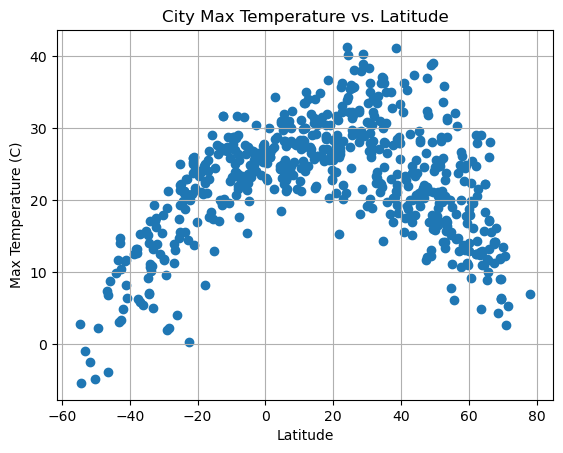

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Temperature vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

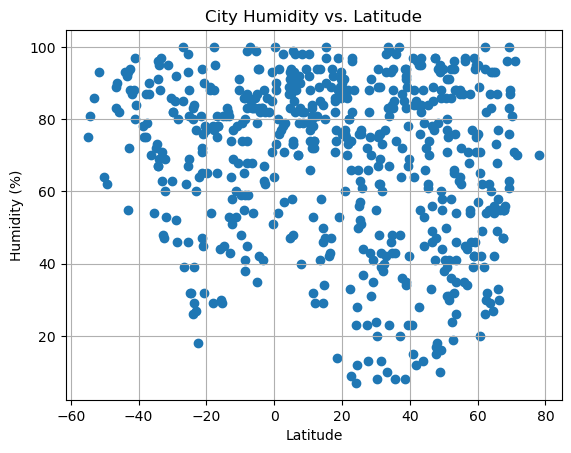

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Humidity vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

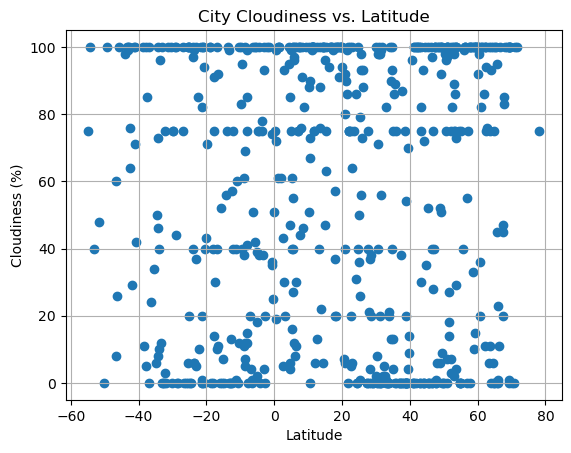

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Cloudiness vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

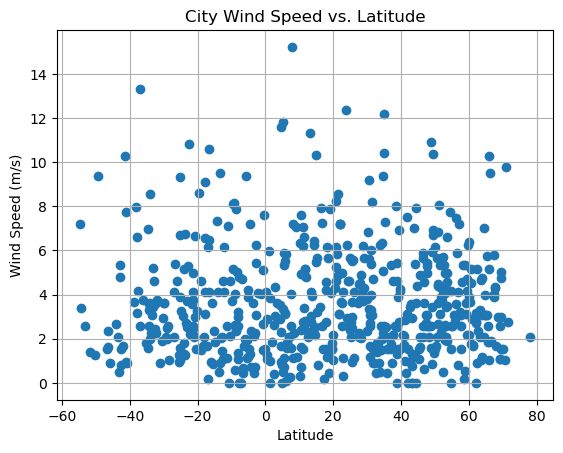

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Wind Speed vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [13]:
def linreg(x, y):
    #initial scatter plot
    plt.scatter(x, y)
    
    #calculates regression line
    r_slope, r_int, r_r, r_p, r_std_err = linregress(x, y)
    r_fit = r_slope * x + r_int
    
    #prints the r value
    print(f'The r-value is: {r_r}')
    reg_line, = plt.plot(x, r_fit, color='red', label=f'y={r_slope:.2f}*x+{r_int:.2f}')
    
    #displays the regression equation, fixed placement needs work
    #plt.text(0, 5, f'y={r_slope:.2f}*x+{r_int:.2f}')
    plt.legend(handles=[reg_line], loc="best")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,happy valley-goose bay,53.3168,-60.3315,17.17,88,75,2.57,CA,1688970669
1,gadzhiyevo,69.2551,33.3362,11.91,61,0,1.07,RU,1688970673
3,akrehamn,59.2667,5.1833,17.78,94,100,3.60,NO,1688970673
4,vadso,70.0744,29.7487,13.49,81,0,1.54,NO,1688970673
5,iqaluit,63.7506,-68.5145,4.85,87,75,1.03,CA,1688970674


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,malinyi,-8.9333,36.1333,25.03,55,11,0.57,TZ,1688970673
7,waitangi,-43.9535,-176.5597,9.90,93,98,2.68,NZ,1688970674
9,adamstown,-25.0660,-130.1015,21.34,69,100,6.72,PN,1688970675
10,blackmans bay,-43.0167,147.3167,14.07,55,99,4.82,AU,1688970606
11,edinburgh of the seven seas,-37.0676,-12.3116,15.30,90,100,13.33,SH,1688970676


The r-value is: -0.5568123070503456


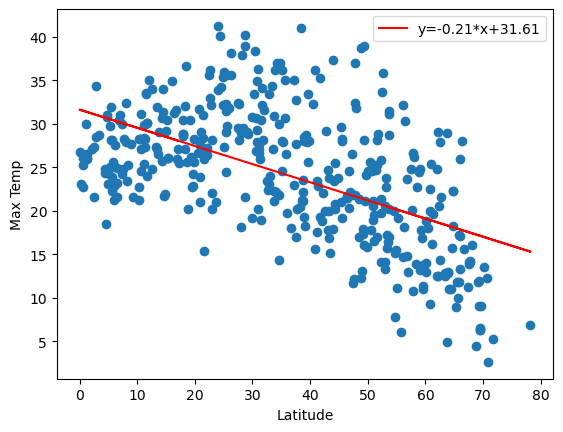

In [16]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

The r-value is: 0.8199658274836329


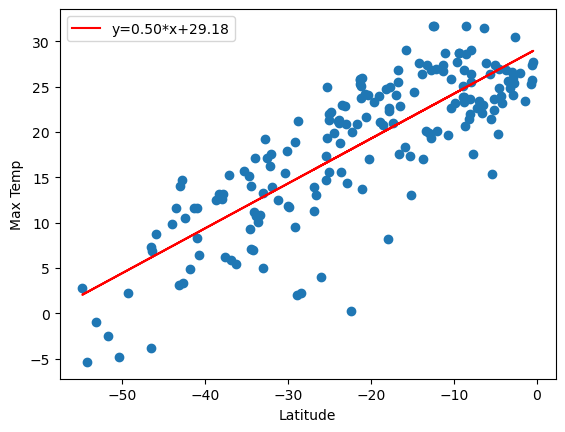

In [17]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

In [1]:
print('We can see that the maximum temperature of a city increases as we appraoch Lat=0 in both the north and south hemispherres.')

We can see that the maximum temperature of a city increases as we appraoch Lat=0 in both the north and south hemispherres.


The r-value is: -0.18197641659639296


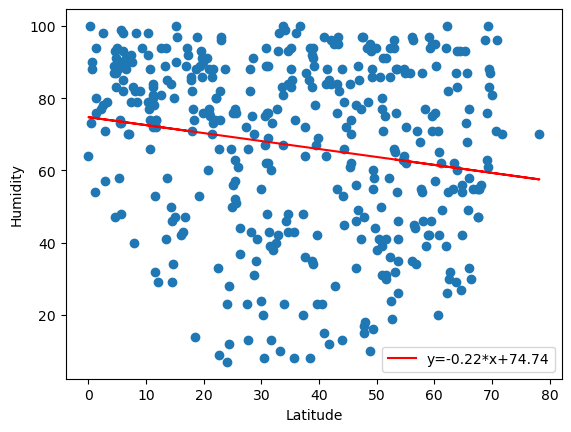

In [19]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

The r-value is: -0.13256103232430902


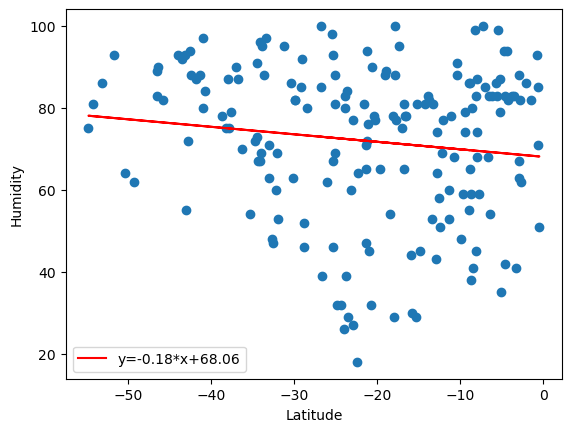

In [20]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

In [2]:
print('The r values and visual inspection of the graphs indicate that there is no correlation between humidity and latitiude.')

The r values and visual inspection of the graphs indicate that there is no correlation between humidity and latitiude.


The r-value is: -0.05544857292713409


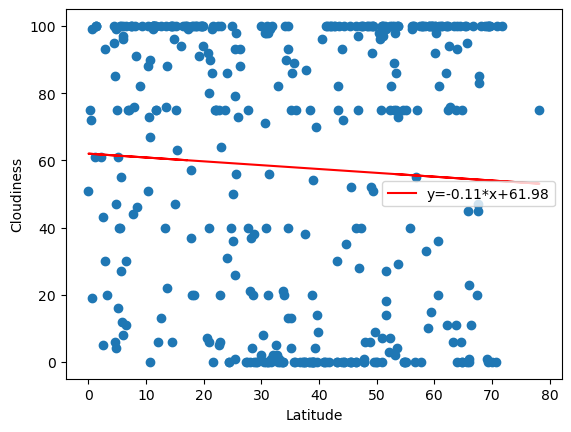

In [22]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

The r-value is: -0.11391858610969872


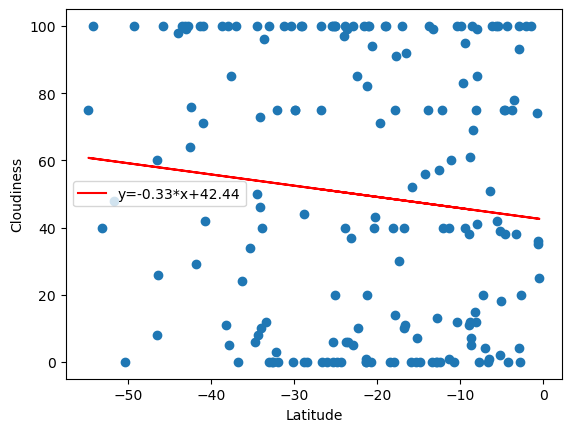

In [23]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

In [3]:
print('The r values and visual inspection of the graphs indicate that there is no correlation between cloudiness and latitiude.')

The r values and visual inspection of the graphs indicate that there is no correlation between cloudiness and latitiude.


The r-value is: -0.018199341618485555


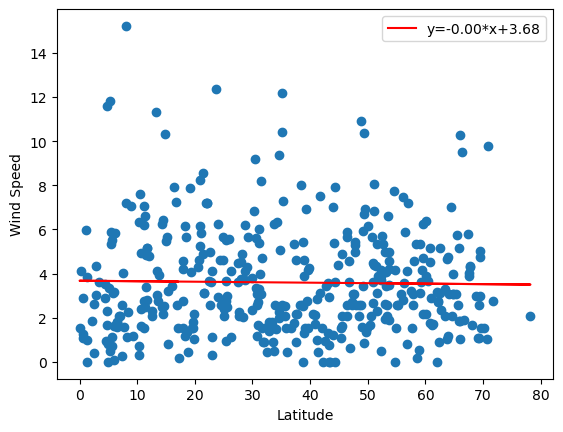

In [25]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

The r-value is: -0.047563562331648136


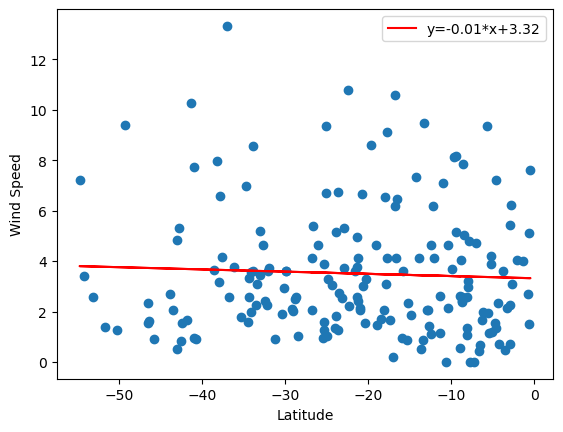

In [26]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

In [4]:
print('The r values and visual inspection of the graphs indicate that there is no correlation between wind speed and latitiude.')

The r values and visual inspection of the graphs indicate that there is no correlation between wind speed and latitiude.
